Looking at the skew and kurtosis of sale price

In [8]:
from config_local import local_config  # provides TRAIN_CSV, TEST_CSV, SUBMISSIONS_DIR

import pandas as pd
import numpy as np
from scipy.stats import boxcox, skew, kurtosis
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv(local_config.TRAIN_FILLED_CSV)   # e.g. data/train_filled.csv           
test = pd.read_csv(local_config.TEST_FILLED_CSV)    # e.g. data/test_filled.csv

In [10]:
salePriceReshape = train["SalePrice"].values.reshape(-1, 1)

salePrice_df = pd.DataFrame(columns = ['SalePrice', 'logSP', 'SquareRootSP', 'BoxCoxSP', 'YeoJohnsonSP', 'QuantileSP', 'QuantileSP'])
transforms = {
    "SalePrice": lambda x: x.ravel(),
    "logSP": lambda x: np.log1p(x).ravel(),
    "SquareRootSP": lambda x: np.sqrt(x).ravel(),
    "BoxCoxSP": lambda x: boxcox(x.ravel())[0],  # BoxCox returns (vals, lambda)
    "YeoJohnsonSP": lambda x: PowerTransformer(method="yeo-johnson").fit_transform(x).ravel(),
    "QuantileSP": lambda x: QuantileTransformer(output_distribution="normal", random_state=0).fit_transform(x).ravel()
}
salePrice_df = pd.DataFrame({name: func(salePriceReshape) for name, func in transforms.items()})

salePrice_df

,SalePrice,logSP,SquareRootSP,BoxCoxSP,YeoJohnsonSP,QuantileSP
0,208500,12.247699,456.618002,7.932608,0.571155,0.624748
1,181500,12.109016,426.028168,7.878261,0.227627,0.311577
2,223500,12.317171,472.757866,7.959615,0.741869,0.764710
3,140000,11.849405,374.165739,7.774952,-0.425386,-0.408805
4,250000,12.429220,500.000000,8.002872,1.015293,1.031509
...,...,...,...,...,...,...
1455,175000,12.072547,418.330013,7.863873,0.136679,0.175278
1456,210000,12.254868,458.257569,7.935401,0.588812,0.637923
1457,266500,12.493133,516.236380,8.027379,1.170202,1.175153
1458,142125,11.864469,376.994695,7.781003,-0.387136,-0.362719


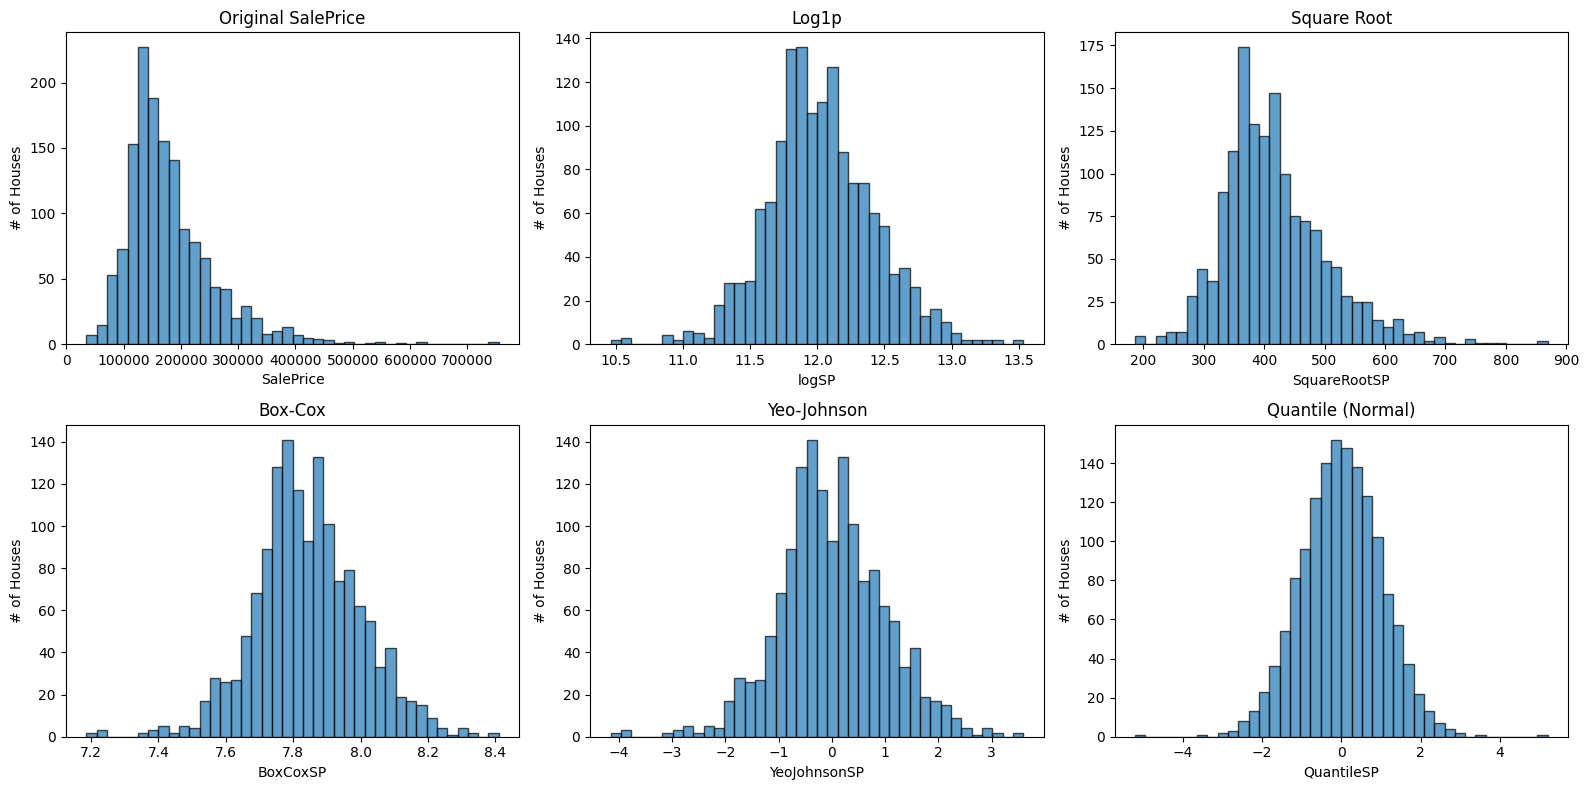

In [11]:
def plot_transforms(df):
    cols = [
        ("SalePrice", "Original SalePrice"),
        ("logSP", "Log1p"),
        ("SquareRootSP", "Square Root"),
        ("BoxCoxSP", "Box-Cox"),
        ("YeoJohnsonSP", "Yeo-Johnson"),
        ("QuantileSP", "Quantile (Normal)")
    ]
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 8))
    axes = axes.ravel()
    
    for ax, (col, title) in zip(axes, cols):
        if col in df.columns:
            ax.hist(df[col], bins=40, edgecolor="k", alpha=0.7)
            ax.set_title(title)
            ax.set_xlabel(col)
            ax.set_ylabel('# of Houses')
            
    plt.tight_layout()
    plt.show()

# Usage:
plot_transforms(salePrice_df)

In [12]:
salePrice_df.to_csv(__import__("pathlib").Path(local_config.TRAIN_CSV).resolve().parent / "SalePriceTransforms.csv", index=False)

In [ ]:
train_outlier_filled_log1 = pd.read_csv(local_config.TRAIN_OUTLIER_FILLED_CSV) 
train_outlier_filled_log1["SalePrice"] = salePrice_df['logSP']
train_outlier_filled_log1.to_csv(__import__("pathlib").Path(local_config.TRAIN_CSV).resolve().parent / "train_outlier_filled_log1.csv", index=False)
